In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
#from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from mlxtend.plotting import plot_confusion_matrix
#from sklearn import metrics

In [26]:
df = pd.read_csv("car_evaluation.csv")
df.head()

,BUYING,MAINTENANCE,DOORS,PERSONS,BOOT,SAFETY,CLASS
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [27]:
df['CLASS'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: CLASS, dtype: int64

In [28]:
#Declare feature vector and target variable 
X = df.drop(['CLASS'], axis=1)
y = df['CLASS']




In [29]:
from sklearn.preprocessing import OrdinalEncoder
buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
person_capacity_category = ['2', '4', 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category]
oe = OrdinalEncoder(categories= all_categories)
X = oe.fit_transform(df[['BUYING', 'MAINTENANCE', 'DOORS', 'PERSONS', 'BOOT', 'SAFETY']])
print(X)

[[3. 3. 0. 0. 0. 0.]
 [3. 3. 0. 0. 0. 1.]
 [3. 3. 0. 0. 0. 2.]
 ...
 [0. 0. 3. 2. 2. 0.]
 [0. 0. 3. 2. 2. 1.]
 [0. 0. 3. 2. 2. 2.]]


In [30]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [22]:
y_train.shape, y_test.shape

((1157,), (571,))

In [34]:
DT_classifier = DecisionTreeClassifier( criterion= 'gini', max_depth= 4, min_samples_split= 10)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=10)

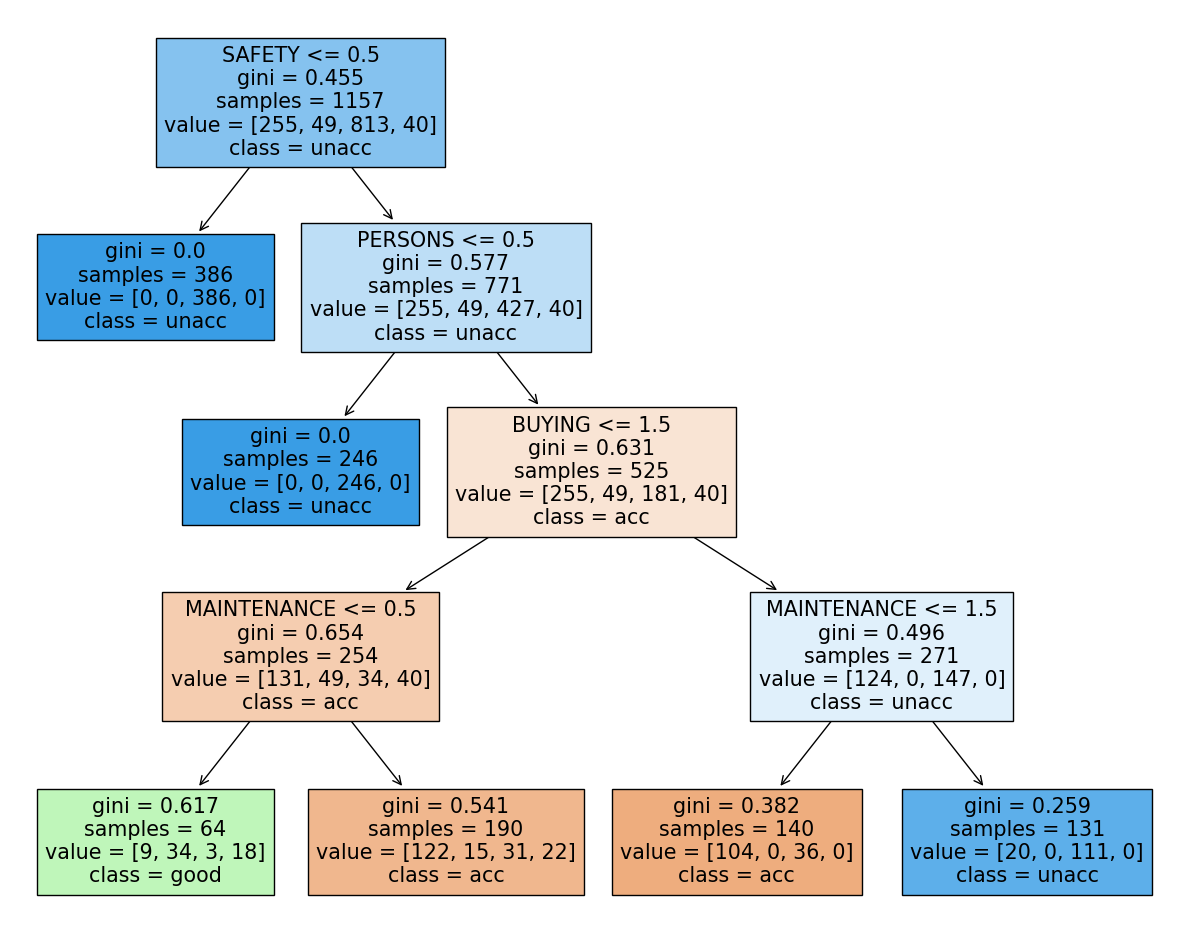

In [35]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
_ = tree.plot_tree(DT_classifier,
feature_names=df.columns[:-1],
class_names= DT_classifier.classes_, filled=True)